In [57]:


import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sbn
import seaborn as sns
from numpy import linalg as la
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [36]:
df =pd.read_csv('./train.csv',parse_dates=True,index_col='id')
df=df.sort_values(by='id')
df.reset_index(inplace=True)
df.head(3)

,id,value
0,2004-11-01,0.5992
1,2005-01-01,-1.2773
2,2005-02-01,8.9098


In [37]:
df['year'] = [d.year -2000 for d in df.id]
df['month'] = [d.month for d in df.id]
df.head()

,id,value,year,month
0,2004-11-01,0.5992,4,11
1,2005-01-01,-1.2773,5,1
2,2005-02-01,8.9098,5,2
3,2005-03-01,14.0236,5,3
4,2005-04-01,23.9407,5,4


In [38]:
x_y = np.array(df['year']) 
x_m = np.array(df['month']) 
T = np.array(df['value'])
x_t = np.array(((x_y)*12 +x_m),dtype=int)
df['time']= x_t
df.head()

,id,value,year,month,time
0,2004-11-01,0.5992,4,11,59
1,2005-01-01,-1.2773,5,1,61
2,2005-02-01,8.9098,5,2,62
3,2005-03-01,14.0236,5,3,63
4,2005-04-01,23.9407,5,4,64


In [39]:
df.head()

,id,value,year,month,time
0,2004-11-01,0.5992,4,11,59
1,2005-01-01,-1.2773,5,1,61
2,2005-02-01,8.9098,5,2,62
3,2005-03-01,14.0236,5,3,63
4,2005-04-01,23.9407,5,4,64


In [40]:
months=[[] for i in range(0,12)] # month[i] represent the index of month_i in x3 labels of ith months
for i in range (0,len(x_t)):
    months[(x_t[i]%12)].append(i)   
months

[[12, 23, 34, 45, 56, 67, 78, 89, 100],
 [1, 24, 35, 46, 57, 68, 79, 90, 101],
 [2, 13, 36, 47, 58, 69, 80, 91, 102],
 [3, 14, 25, 48, 59, 70, 81, 92, 103],
 [4, 15, 26, 37, 60, 71, 82, 93, 104],
 [5, 16, 27, 38, 49, 72, 83, 94, 105],
 [6, 17, 28, 39, 50, 61, 73, 84, 95],
 [7, 18, 29, 40, 51, 62, 85, 96, 106],
 [8, 19, 30, 41, 52, 63, 74, 97, 107],
 [9, 20, 31, 42, 53, 64, 75, 86, 108],
 [10, 21, 32, 43, 54, 65, 76, 87, 98, 109],
 [0, 11, 22, 33, 44, 55, 66, 77, 88, 99]]

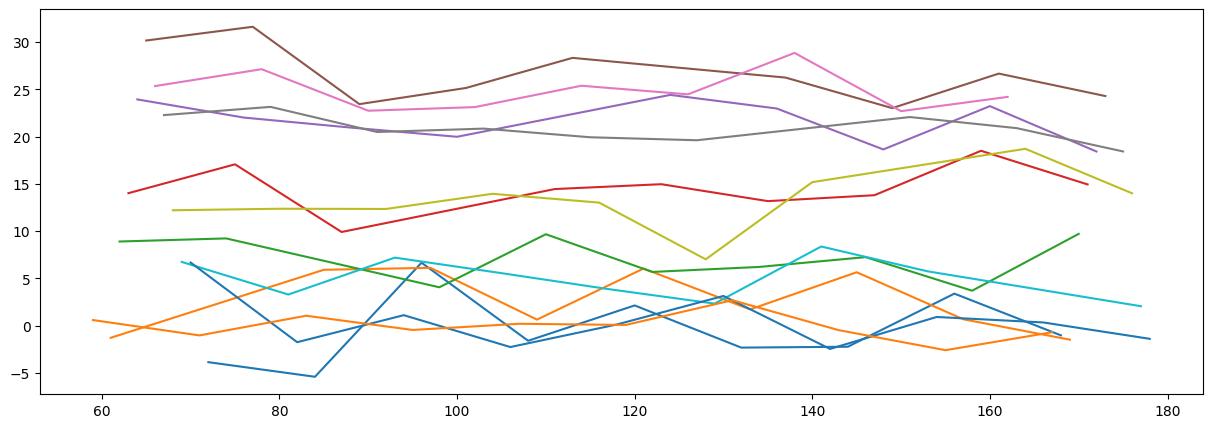

In [41]:
plt.figure(figsize=(15,5))
for i in range(0,12):
    
    plt.plot(x_t[np.array(months[i])],T[np.array(months[i])])
plt.show()

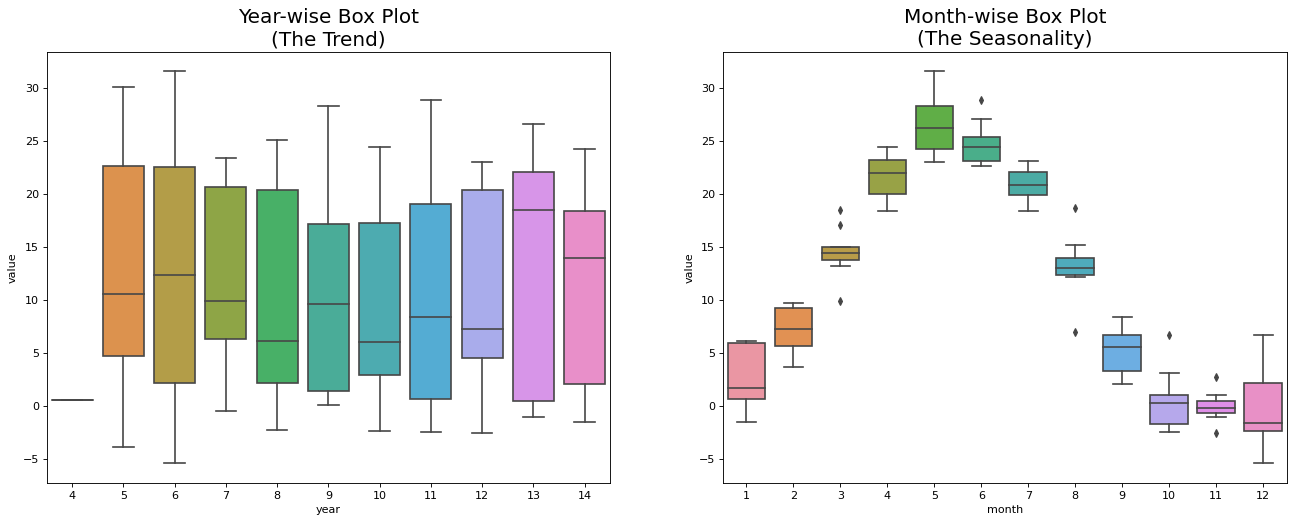

In [42]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sbn.boxplot(x='year', y='value', data=df, ax=axes[0])
sbn.boxplot(x='month', y='value', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

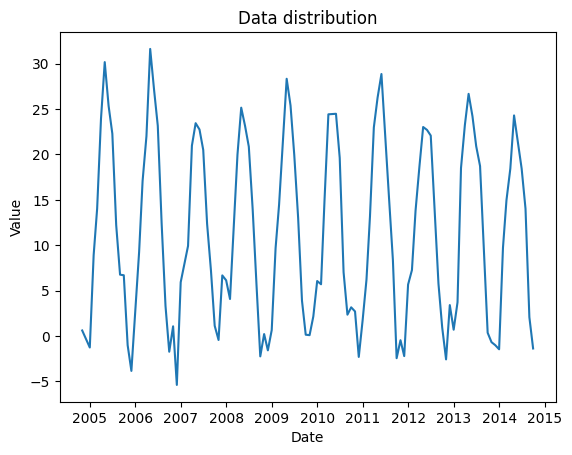

In [43]:
# Data Visualisation
train_data = '../part2/train.csv'
f = open(train_data, 'r')
x, y = [], []

for line in f.readlines()[1:]:
    nums = line.strip().split(',')
    tokens = nums[0].split('/')
    x.append('/'.join(tokens))
    y.append(float(nums[1]))
f.close()

x = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in x]
x, y = zip(*sorted(zip(x, y)))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data distribution')
plt.show()

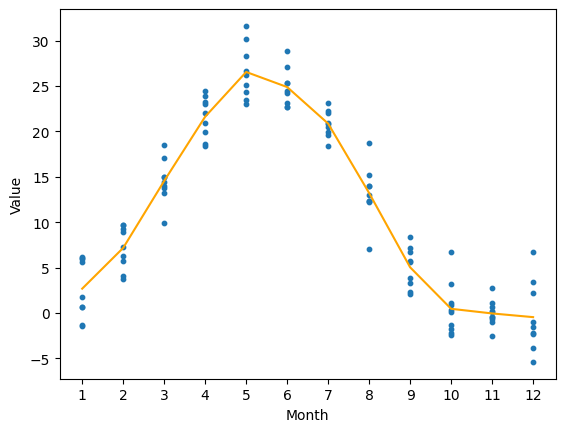

In [44]:
 #For Scatter plots of data on the basis of month
x_mon = [xi.month for xi in x]
m_avg = [[] for i in range(12)]

for (m, y_out) in zip(x_mon, y):
    m_avg[m-1].append(y_out)
m_avg = [np.array(m).mean() for m in m_avg]

plt.scatter(x_mon, y, s=10)
plt.plot(range(1,13), m_avg, color='orange')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(range(1,13))
plt.show()

In [45]:
poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(x_m.reshape(-1, 1))
poly_reg_model = LR()
poly_reg_model.fit(poly_features, T)
y_predicted = poly_reg_model.predict(poly_features)


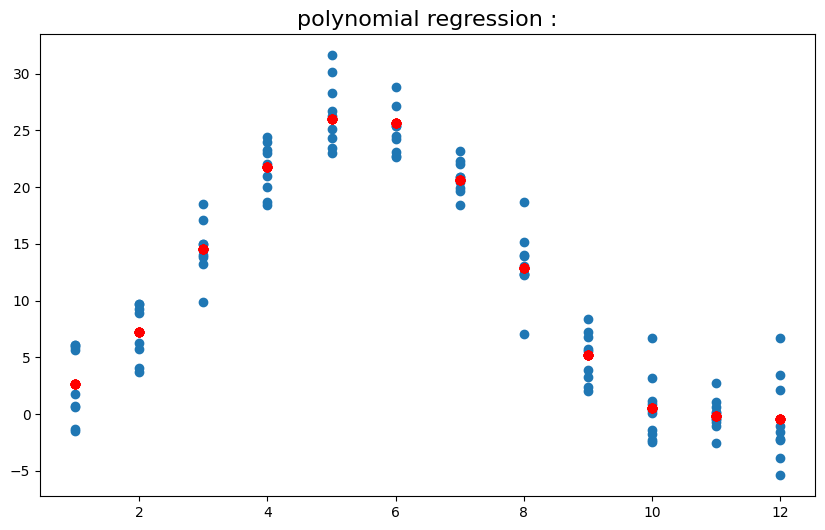

In [46]:
plt.figure(figsize=(10, 6))
plt.title("polynomial regression :", size=16)
plt.scatter(x_m, T)
plt.scatter(x_m, y_predicted, c="red")
plt.show()

correlation matrix AxesSubplot(0.125,0.11;0.62x0.77)

monthwise mean 
 month
1      2.67310
2      7.16470
3     14.54290
4     21.62410
5     26.55160
6     24.88840
7     20.86120
8     13.20730
9      5.02600
10     0.45232
11    -0.05744
12    -0.46550
Name: value, dtype: float64


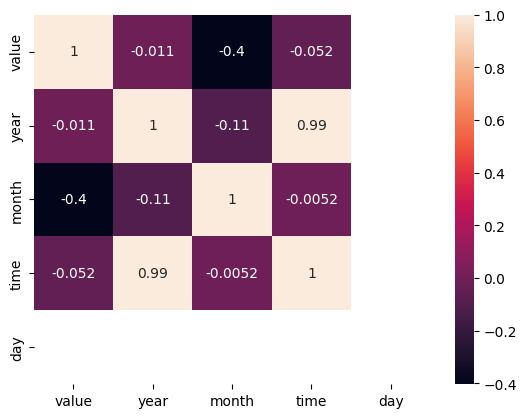

In [47]:
df['new_id']=pd.to_datetime(df['id'])
df['year']=df['new_id'].dt.year
df['month']=df['new_id'].dt.month
df['day']=df['new_id'].dt.day
print('correlation matrix', sns.heatmap(df.corr(),annot=True))
print("")
print('monthwise mean \n', df.groupby('month').mean()['value'])

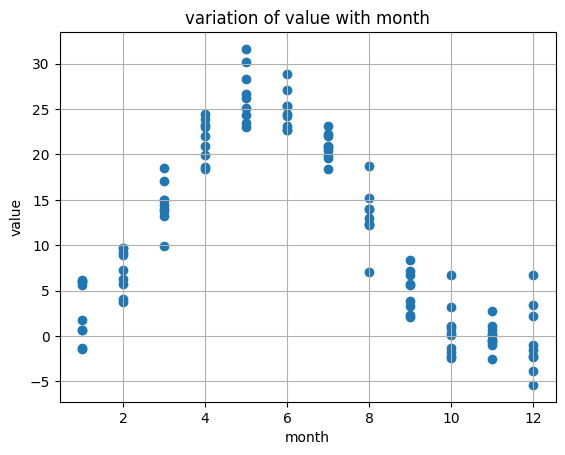

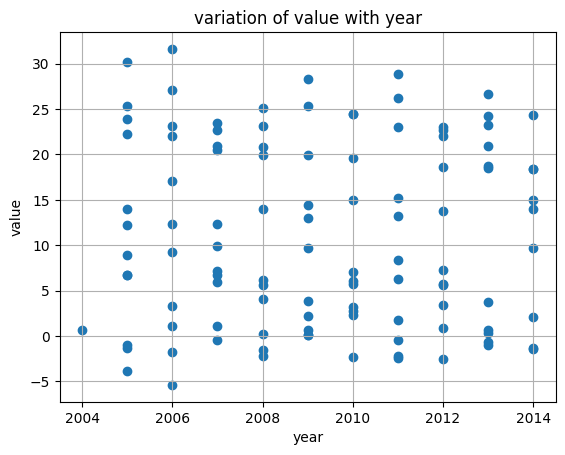

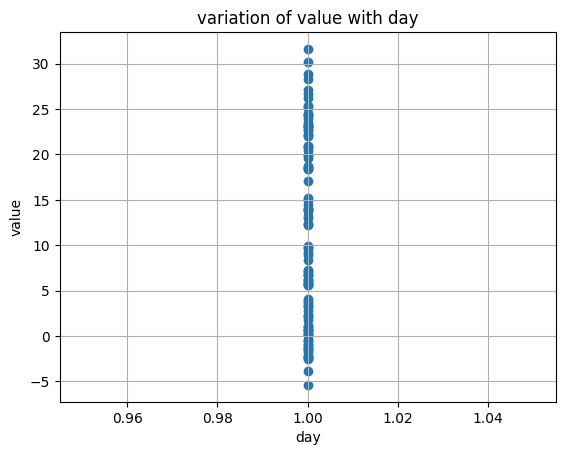

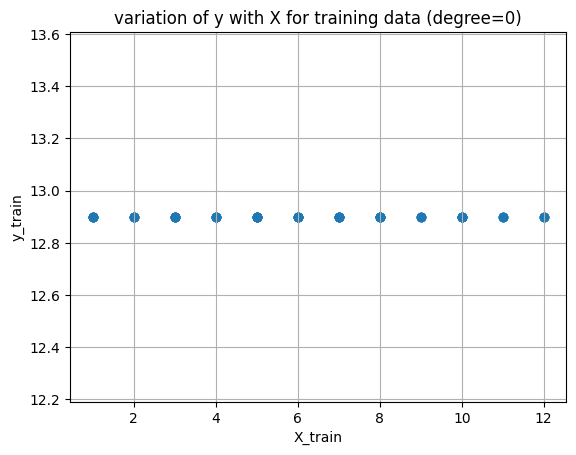

RMSE (train)): 10.205344005403653
RMSE (validation): 10.318484409737362


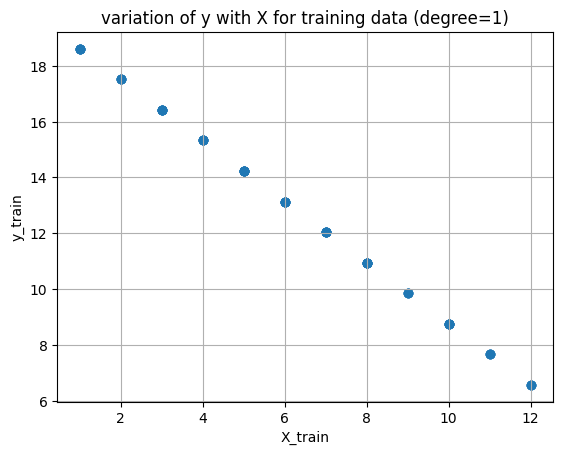

RMSE (train)): 9.581312519554514
RMSE (validation): 8.843687053732143


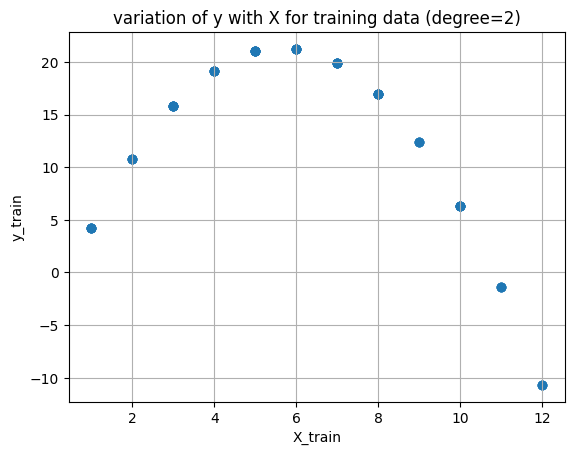

RMSE (train)): 5.231722432692452
RMSE (validation): 5.671365279893651


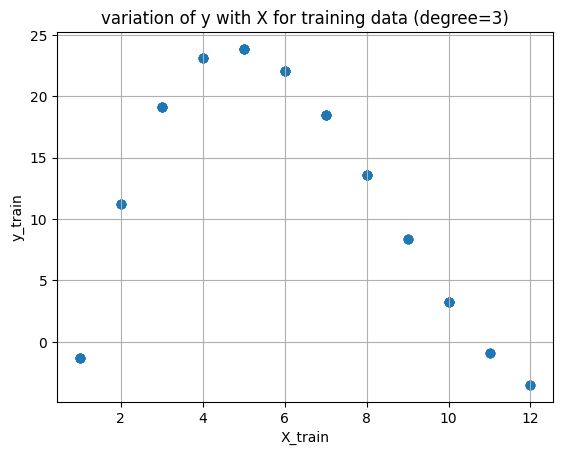

RMSE (train)): 3.934197022817203
RMSE (validation): 3.626750120014217


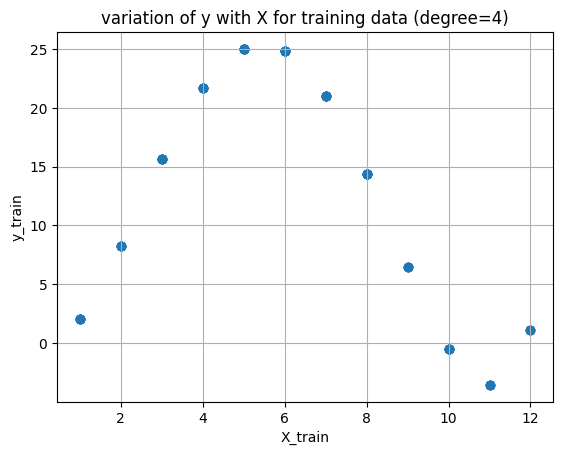

RMSE (train)): 2.8196523675296077
RMSE (validation): 2.9045781912788007


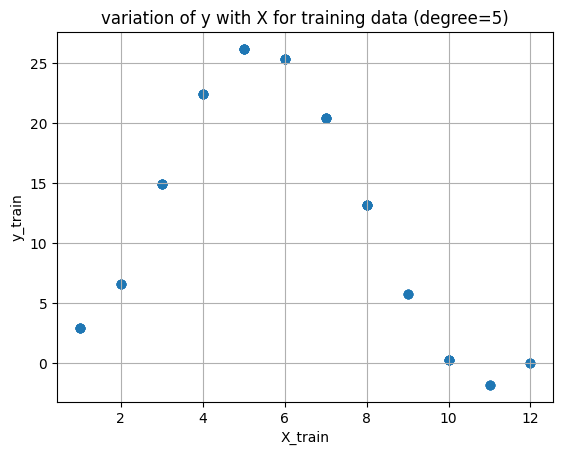

RMSE (train)): 2.6274193075060963
RMSE (validation): 2.3770386907027454


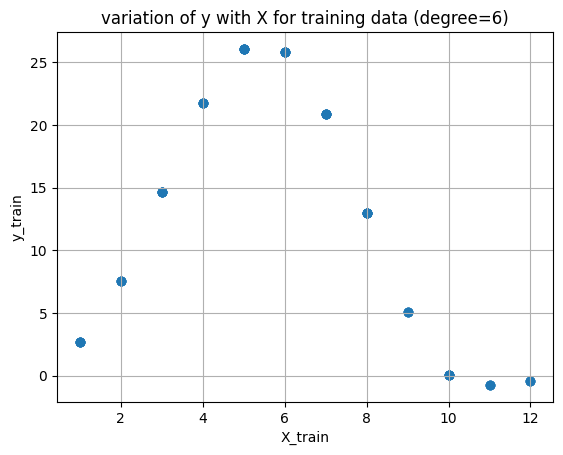

RMSE (train)): 2.575758964722045
RMSE (validation): 2.285083061700864


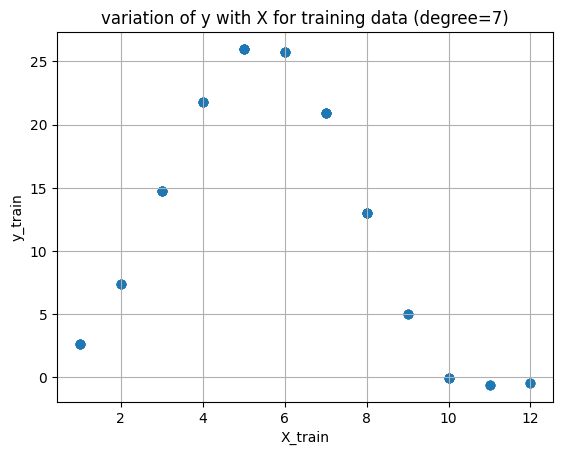

RMSE (train)): 2.5745549602835003
RMSE (validation): 2.2784560579123636


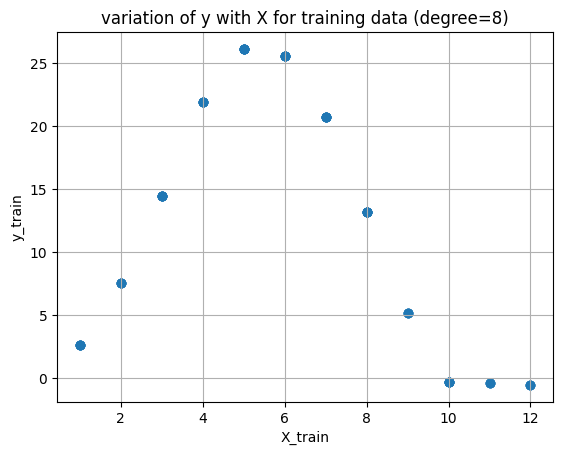

RMSE (train)): 2.5673936595605777
RMSE (validation): 2.286263134172702


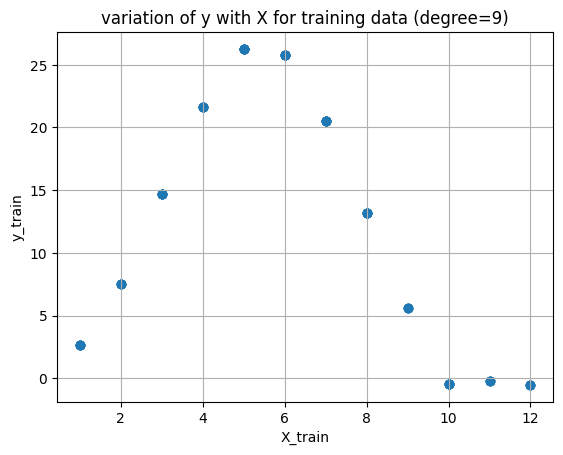

RMSE (train)): 2.558605870073531
RMSE (validation): 2.350857482856144


In [48]:


X=df['month']
y=df['value']
plt.xlabel('month')
plt.ylabel('value')
plt.title('variation of value with month')
plt.grid(visible=True)
plt.scatter(df['month'],df['value'])
plt.show()
plt.figure()
plt.xlabel('year')
plt.ylabel('value')
plt.title('variation of value with year')
plt.grid(visible=True)
plt.scatter(df['year'],df['value'])
plt.show()
plt.figure()
plt.xlabel('day')
plt.ylabel('value')
plt.title('variation of value with day')
plt.grid(visible=True)
plt.scatter(df['day'],df['value'])
plt.show()
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)
RMSE_train=[]
RMSE_val=[]
max_degree=10
for i in range(max_degree):
# print(i)    
    poly = PolynomialFeatures(degree = i)
    X_poly_train=poly.fit_transform(X_train.reshape(-1,1))
    model=LR()
    model.fit(X_poly_train, y_train)
 
# making predictions 
    y_pred = model.predict(X_poly_train)
    plt.figure()
    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.title(f'variation of y with X for training data (degree={i})')

    plt.grid(visible=True)
    plt.scatter(X_train,y_pred)
    plt.show()
    print('RMSE (train)):',np.sqrt(mse(y_train,y_pred)))
    X_poly_val=poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred=model.predict(X_poly_val)
    print('RMSE (validation):',np.sqrt(mse(y_val,y_val_pred)))

    
    RMSE_train.append(np.sqrt(mse(y_train,y_pred)))
    RMSE_val.append(np.sqrt(mse(y_val,y_val_pred)))
    



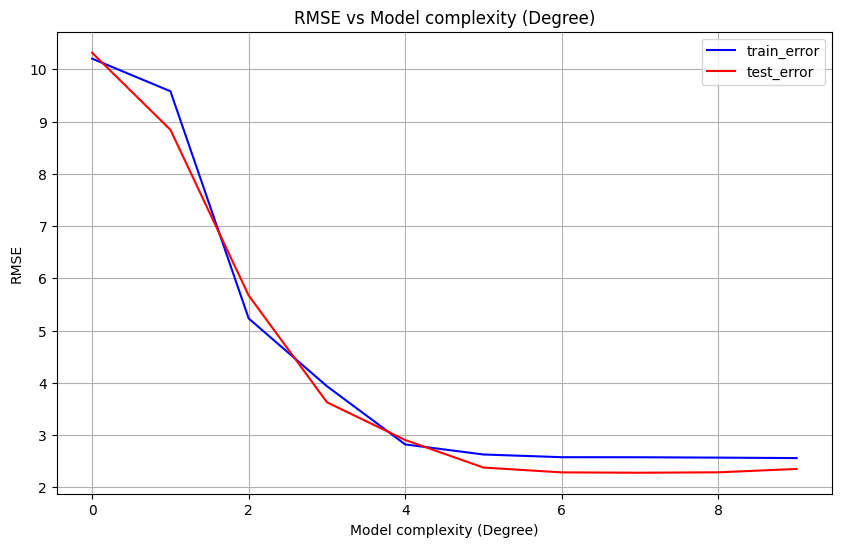

2.558605870073531 2.2784560579123636


In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')

plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))

In [83]:
X=df['month']
y=df['value']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)
RMSE_train=[]
RMSE_val=[]
max_degree=10
for i in range(max_degree):
    
    poly = PolynomialFeatures(degree = i)
    x_poly_train=poly.fit_transform(X_train.reshape(-1,1))
    model=Ridge()
    model.fit(x_poly_train, y_train)
 
# making predictions 
    y_pred = model.predict(x_poly_train)
    x_poly_val=poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred=model.predict(x_poly_val)
    RMSE_train.append(np.sqrt(mse(y_train,y_pred)))
    RMSE_val.append(np.sqrt(mse(y_val,y_val_pred)))

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.08871e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.93445e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


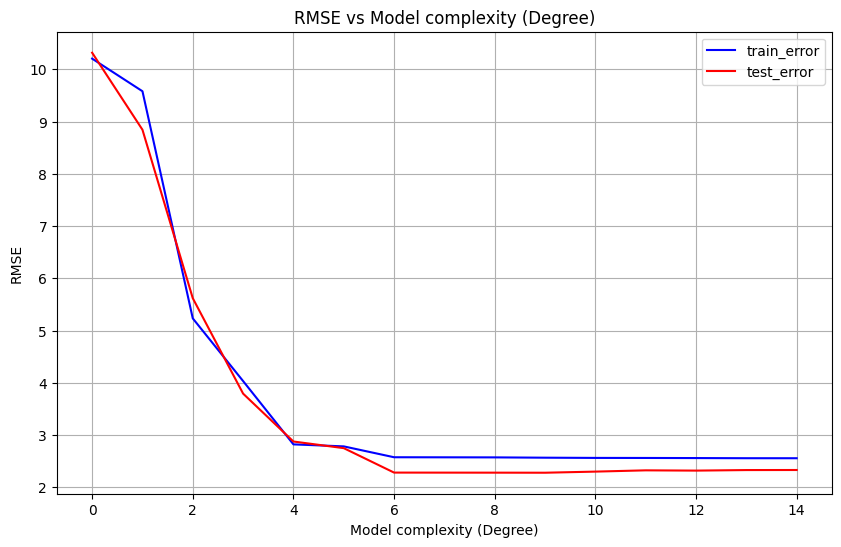

2.5575276817298485 2.2802401334972155


In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')

plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))

In [68]:
X=np.array(X).reshape(-1,1)
poly=PolynomialFeatures(degree=5)
x_poly_train=poly.fit_transform(X)
model=Ridge()

In [66]:
x_poly_train.shape

(110, 6)

In [67]:
y.shape

(110,)

In [69]:

alpha = np.linspace(0,1,11)

clf=GridSearchCV(model,{'alpha': alpha},scoring='neg_mean_squared_error',cv=5)
clf.fit(x_poly_train,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [70]:
clf.best_params_

{'alpha': 0.0}

In [62]:
X=df['month']
y=df['value']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)
RMSE_train=[]
RMSE_val=[]
max_degree=10
for i in range(max_degree):
    
    poly = PolynomialFeatures(degree = i)
    x_poly_train=poly.fit_transform(X_train.reshape(-1,1))
    model=Lasso()
    model.fit(x_poly_train, y_train)
 
# making predictions 
    y_pred = model.predict(x_poly_train)
    x_poly_val=poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred=model.predict(x_poly_val)
    RMSE_train.append(np.sqrt(mse(y_train,y_pred)))
    RMSE_val.append(np.sqrt(mse(y_val,y_val_pred)))

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+03, tolerance: 7.603e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.102e+02, tolerance: 7.603e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-p

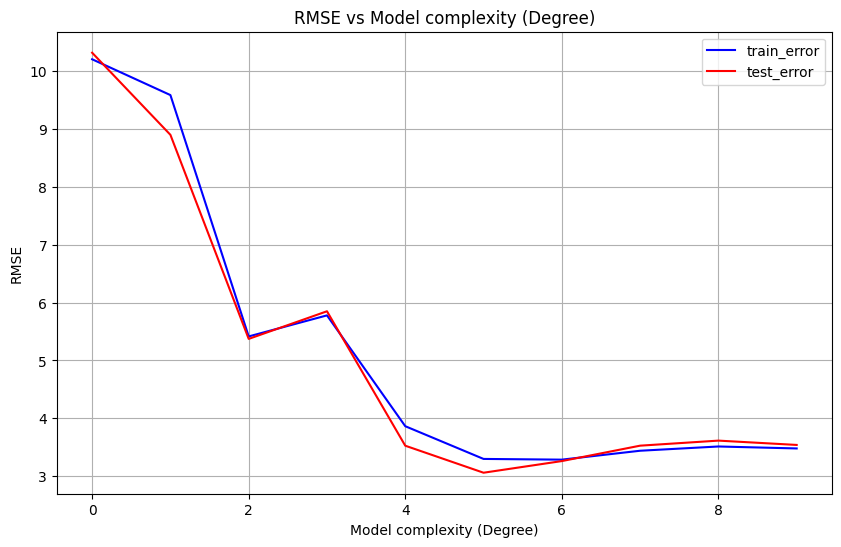

3.285496975164284 3.059454781676543


In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')

plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))

In [79]:
from sklearn.linear_model import ElasticNet
X=df['month']
y=df['value']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)
RMSE_train=[]
RMSE_val=[]
max_degree=10
for i in range(max_degree):
    
    poly = PolynomialFeatures(degree = i)
    x_poly_train=poly.fit_transform(X_train.reshape(-1,1))
    model=ElasticNet()
    model.fit(x_poly_train, y_train)
 
# making predictions 
    y_pred = model.predict(x_poly_train)
    x_poly_val=poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred=model.predict(x_poly_val)
    RMSE_train.append(np.sqrt(mse(y_train,y_pred)))
    RMSE_val.append(np.sqrt(mse(y_val,y_val_pred)))

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.590e+02, tolerance: 7.603e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.983e+02, tolerance: 7.603e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-p

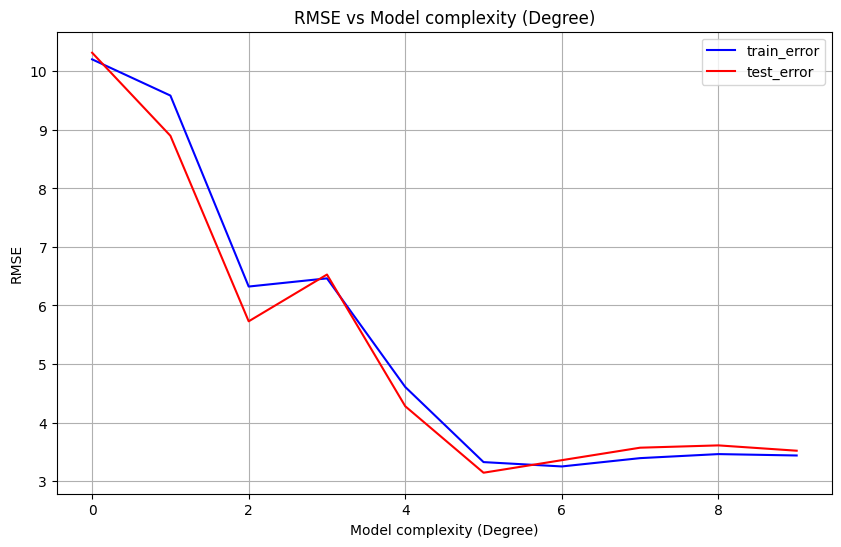

3.2499569649147935 3.142763472985295


In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')

plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))

In [88]:

alpha = np.linspace(0,1,11)
l1_ratio=np.linspace(0,1,6)
X=np.array(X).reshape(-1,1)
poly=PolynomialFeatures(degree=6)
x_poly_train=poly.fit_transform(X)
model=ElasticNet()


In [91]:
clf=GridSearchCV(model,
            {'alpha': alpha, 'l1_ratio': l1_ratio},
            cv=5,scoring='neg_mean_squared_error')


In [92]:
clf.fit(x_poly_train,y)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fea

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             scoring='neg_mean_squared_error')

In [93]:
clf.best_params_

{'alpha': 0.1, 'l1_ratio': 0.6000000000000001}

In [99]:
df_test=pd.read_csv('test.csv')
df_test['id']=pd.to_datetime(df_test['id'])

df_test['month']=df_test['id'].dt.month
X_test=df_test['month']
X_test=np.array(X_test).reshape(-1,1)
x_poly_test=poly.fit_transform(X_test)

y_test_pred=clf.predict(x_poly_test)



In [102]:
y=pd.DataFrame({'id':df_test['id'],'value':y_test_pred})
y.to_csv('2021AMA2095_RESULT.csv')
print("")
print('final y_predicted on test data')
print("")
print(pd.DataFrame(y))


final y_predicted on test data

          id      value
0 2010-05-01  23.483014
1 2009-04-01  21.165688
2 2013-09-01   7.572317
3 2006-01-01   1.861757
4 2007-02-01   9.781397
5 2012-08-01  14.415503
6 2014-06-01  23.065817
7 2008-03-01  16.426833
8 2004-12-01   0.455463
9 2011-07-01  19.905110
